In [2]:
#importing libraries
import pandas as pd  #numerical computation
import numpy as np   #data manipulation and analysis
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #data visualization
import math


In [6]:
#loading the data and reading it
titanic=pd.read_csv("tested.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Data inspection
titanic.shape
#there are 418 rows and 12 columns

(418, 12)

In [7]:
#summary of all statistics using describe()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#showing missing values
print("Missing values:\n")
(titanic.isnull().sum())

Missing values:



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

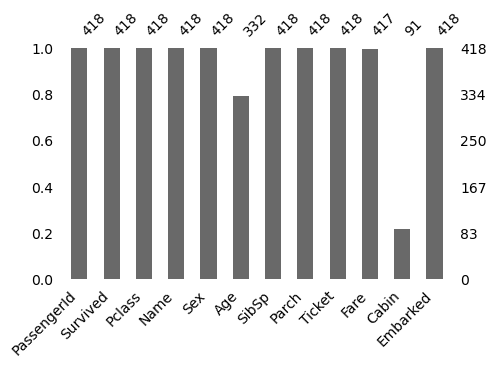

In [9]:
#visualizing missing values
import missingno as msno
msno.bar(titanic,figsize=(5, 3),fontsize=(10))

In [10]:
def count_plot(feature):
#the count_plot function creates a barplot showing counts of unique values of categorical variables    
    sns.countplot(x=feature,data=titanic)
    plt.show()

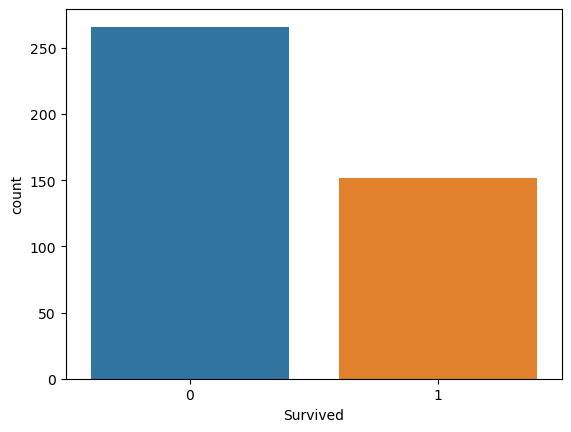

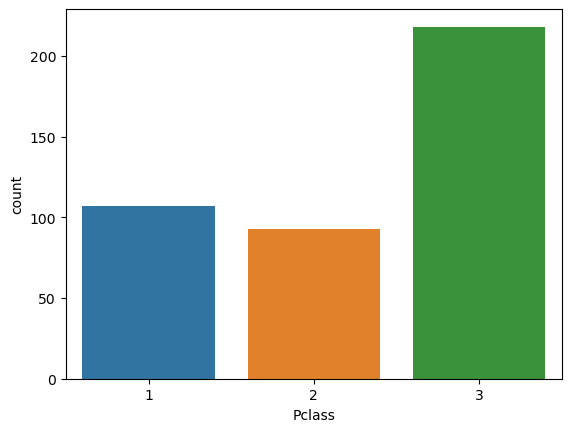

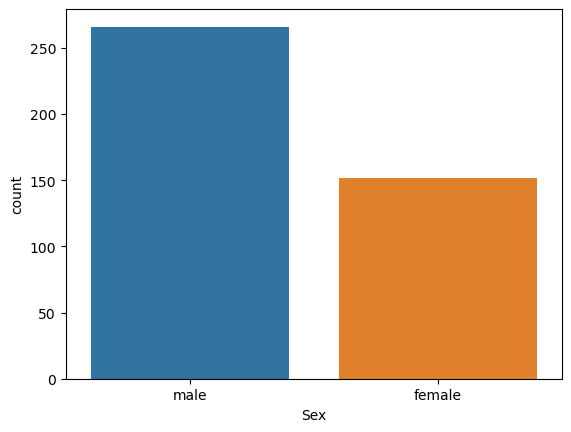

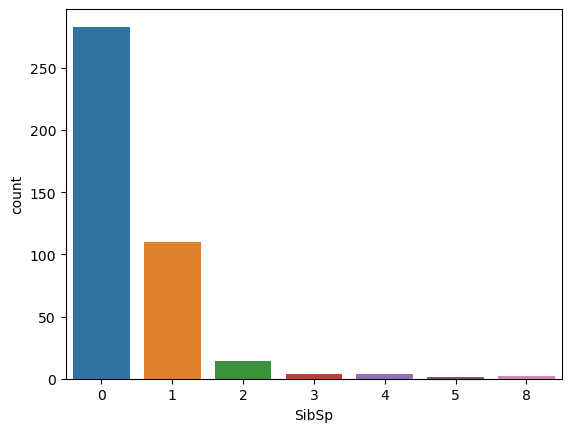

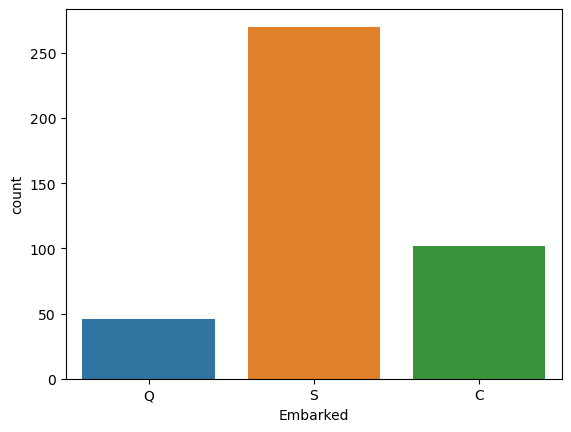

In [11]:
columns=['Survived','Pclass','Sex','SibSp','Embarked']
for i in columns:
    count_plot(i)

C:\Users\91797\AppData\Local\Temp\ipykernel_14828\3663576411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),annot= True)


<Axes: >

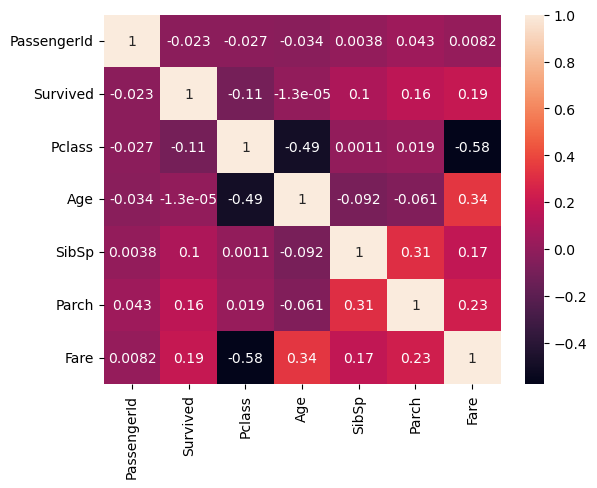

In [12]:
# correlation between features using heatmap
import seaborn as sns    
sns.heatmap(titanic.corr(),annot= True)

In [13]:
#dropping columns i.e garbage data which is not required
titanic = titanic.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

Data processing

In [14]:
#checking the datatypes
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
#dropping the null values using dropna() function
titanic.dropna(inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
#dropping the duplicate values
titanic.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1,3,female,3.0,1,1,13.7750,S
411,1,1,female,37.0,1,0,90.0000,Q
412,1,3,female,28.0,0,0,7.7750,S
414,1,1,female,39.0,0,0,108.9000,C


In [17]:
#using dummies variable to convert categorical/string data og Embarked column in indicator data
port_dummies = pd.get_dummies(titanic['Embarked'])
port_dummies.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [18]:
#using dummies variable to convert categorical/string data og Embarked column in indicator data
sex_dummies = pd.get_dummies(titanic['Sex'])
sex_dummies.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [19]:
#joining these values in the original dataset
titanic =pd.concat([titanic,sex_dummies,port_dummies],axis=1)
titanic.drop(['Embarked','Sex'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [20]:
#assigning the variables 
x=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
#splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [23]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
179,1,64.0,0,2,83.1583,1,0,1,0,0
89,2,2.0,1,1,23.0000,0,1,0,0,1
409,3,3.0,1,1,13.7750,1,0,0,0,1
395,1,18.0,1,0,60.0000,1,0,0,0,1
172,3,23.0,1,0,13.9000,0,1,0,0,1


LOGISTIC REGRESSION

In [24]:
#importing the logistic_regression model from the scikit-learn library
from sklearn.linear_model import LogisticRegression

In [25]:
#initialize the model
log_reg=LogisticRegression()

In [26]:
#fitting and training the model
log_reg.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred_train=log_reg.predict(x_train)
y_pred_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

1.0

In [29]:
from sklearn.metrics import classification_report
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       147\n           1       1.00      1.00      1.00        84\n\n    accuracy                           1.00       231\n   macro avg       1.00      1.00      1.00       231\nweighted avg       1.00      1.00      1.00       231\n'

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_pred_train)

array([[147,   0],
       [  0,  84]], dtype=int64)

In [31]:
y_pred_test=log_reg.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

1.0

In [33]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[57,  0],
       [ 0, 43]], dtype=int64)